What continent from Asia, Africa, Europe, Oceania, NAmerica, SAmerica to display? Oceania


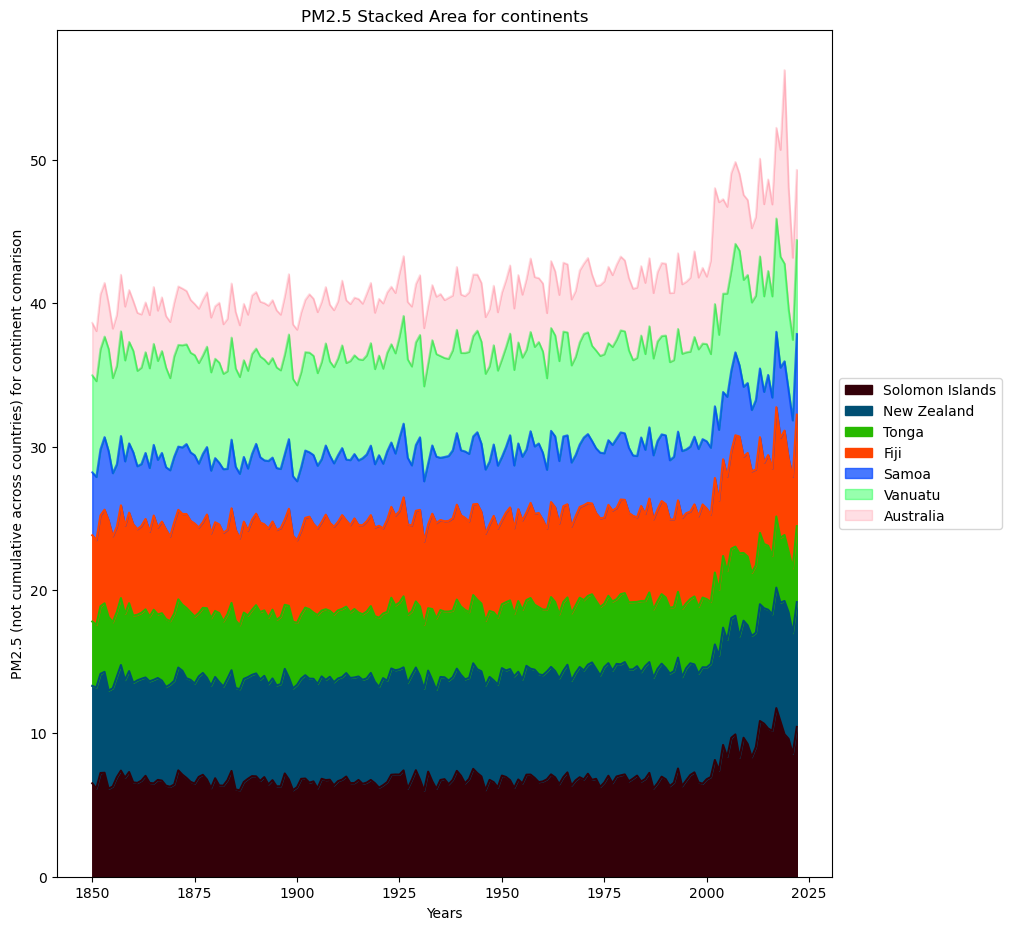

In [3]:
#STACKED AREA CHART
import pandas as pd
import matplotlib.pyplot as plt
import fnmatch
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import ListedColormap
import numpy as np
import math
import matplotlib


#SPLIT DATAFRAME DEPENDING ON SELECTED CONTINENT
continent = input('What continent from Asia, Africa, Europe, Oceania, NAmerica, SAmerica to display?')
data_coord = pd.read_csv('CityPos.csv', index_col=0, encoding='latin-1')
data_world = pd.read_csv('airpm2-5.csv', index_col=0, encoding='latin-1')
to_filter = data_coord.T
data_filter_T = to_filter.loc[to_filter['Continent'] == continent]
data_filter = data_filter_T.T
#If glob detects one of these in main dataframe
#Check against Containee contries and if no match
#Add space at end of string


#FOR EACH CITY EXTRACT COUNTRY AND SEARCH IF COUNTRY IS IN NEW DATAFRAME
#IF NOT THEN PUT COUNTRY IN NEW DATAFRAME
column_names = []
data_filter = (data_filter.T.reset_index()).T
counter = 0
for counter in range(len(data_filter.columns)):
    string = data_filter.iloc[0,counter]
    string = string.rsplit(', ',1)
    string = string[1]
    column_names.append(string)
column_names = list(set(column_names))
row_names = list(range(1850,2023))
df = pd.DataFrame(index=row_names, columns=column_names)


#FOR EACH COUNTRY FIND MATCHING COLUMNS AND PUT THESE IN ARRAY OF ARRAYS
#FOR EACH YEAR FIND AVERAGE OF THESE COLUMNS FOR YEAR AND PUT IN NEW DATAFRAME
#for each year in original dataframe
data_world = data_world.iloc[:,:209]
data_world = (data_world.T.reset_index()).T
for i in range((len(data_world)-1)):
#go through every country in original dataframe
    for x in range(len(data_filter.columns)):
        total = 0
        occur = 0
#fnmatch and running total each pm2.5 and count how many are there
        for y in range(len(data_world.columns)):
            country = data_world.iloc[0,y]
            country = country.rsplit(', ',1)
            country = country[1]
            if x < len(df.columns):
                if df.columns[x] == country:
                    #print(float(data_world.iloc[i+1,y]))
                    total = total + float(data_world.iloc[i+1,y])
                    occur = occur + 1
#find average and put in appropriate place in dataframe
        if occur > 0:
            avg = total/occur
            df.iloc[i,x] = avg


#Colourmap generation function from xuancong84 on stack overflow
def generate_colormap(N):
    arr = np.arange(N)/N
    N_up = int(math.ceil(N/7)*7)
    arr.resize(N_up)
    arr = arr.reshape(7,N_up//7).T.reshape(-1)
    ret = matplotlib.cm.gist_rainbow(arr)
    n = ret[:,3].size
    a = n//2
    b = n-a
    for i in range(3):
        ret[0:n//2,i] *= np.arange(0.2,1,0.8/a)
    ret[n//2:,3] *= np.arange(1,0.1,-0.9/b)
    return ret
N = 8

#PLOT GRAPH OF PM2.5 
df.plot.area(cmap=ListedColormap(generate_colormap(N*N)))
fig = plt.gcf()
ax = plt.gca()
fig.set_size_inches(10, 11)
ax.set_xlabel(xlabel='Years')
ax.set_ylabel(ylabel='PM2.5 (not cumulative across countries) for continent comarison')
ax.set_title(label='PM2.5 Stacked Area for continents')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)